# Decision Tree

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [1]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [2]:
%run data_evaluation.ipynb

### Imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


### Hyperparmeters

In [4]:
# for get_data function
enable_feature_engineering_gender = True
enable_feature_engineering_height_weight = True 
enable_feature_engineering_gluc_chol = True
enable_feature_engineering_alco_smoking = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.8, 0.0, 0.2)

### Get the data

In [5]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering_gender, enable_feature_engineering_height_weight, enable_feature_engineering_gluc_chol, enable_feature_engineering_alco_smoking, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 2588 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 13 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 183 rows -> systolic bp too low.
Dropped 46 rows -> systolic bp too high.
Dropped 38 rows -> diastolic bp too low.
Dropped 904 rows -> diastolic bp too high.
Dropped 98 rows -> sytolic bp was lower than diastolic.


D:\Programms\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


## Model

### Create and train the model

In [6]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt)

DecisionTreeClassifier()


## Evaluation

### Predict the test set

In [7]:
y_prob = dt.predict(x_test)
y_pred = np.round(y_prob)

y_proba = dt.predict_proba(x_test)[:,1]

In [8]:
y_proba

array([1., 0., 0., ..., 1., 1., 0.])

### Apply the evaluation metrics

Accuracy Score:
0.6354284849860071

Precision Score:
0.6319550015202189

Recall Score:
0.6340756558877364

F1-Score:
0.6330135526115425

Cost:
7219



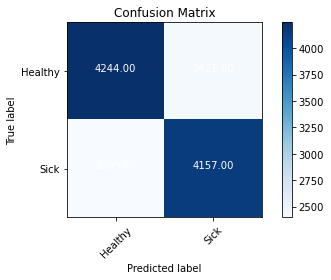

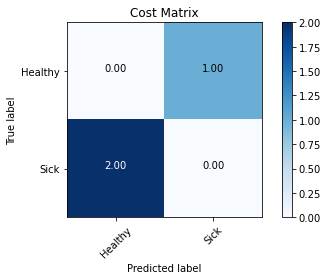

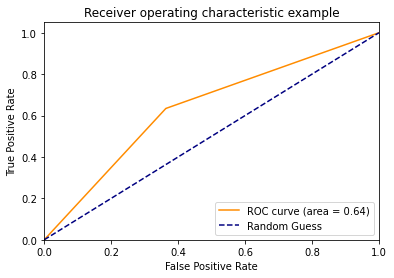


ROC Score:
0.6354659859290631


In [9]:
show_evaluation(y_test, y_pred, y_proba)

In [10]:
 # Creating an standardscaler object
std_slc = StandardScaler()

    # Creating a pca object
pca = decomposition.PCA()


    # Creating a pipeline of three steps. First, standardizing the data.
    # Second, tranforming the data with PCA.
    # Third, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('dt', dt)])

    # Creating Parameter Space
    # Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,x_train.shape[1]+1,1))

    # Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

    # Creating a dictionary of all the parameter options 
    # Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                    dt__criterion=criterion,
                    dt__max_depth=max_depth)

    # Conducting Parameter Optmization With Pipeline
    # Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

    # Fitting the grid search
clf_GS.fit(x_train, y_train)

    # Viewing The Best Parameters
#print('Best Criterion:', clf_GS.best_estimator_.get_params()['dt__criterion'])
#print('Best max_depth:', clf_GS.best_estimator_.get_params()['dt__max_depth'])
#print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
#print(); print(clf_GS.best_estimator_.get_params()['dt'])

   


GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12]})

In [11]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dt__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dt__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dt'])

y_prob1 = clf_GS.predict(x_test.astype('float32'))
y_pred1 = np.round(y_prob1)
y_proba1 = clf_GS.predict_proba(x_test)[:,1]

Best Criterion: entropy
Best max_depth: 8
Best Number Of Components: 12

DecisionTreeClassifier(criterion='entropy', max_depth=8)


Accuracy Score:
0.7278571968837455

Precision Score:
0.7518732970027248

Recall Score:
0.6734289200732154

F1-Score:
0.710492436433859

Cost:
5739



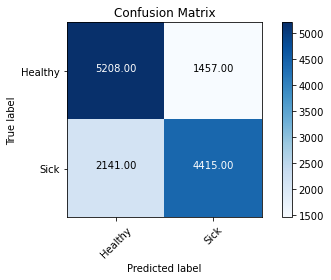

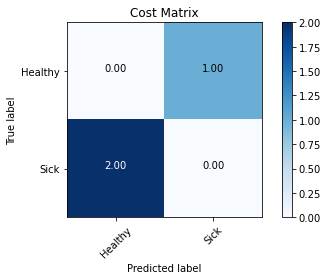

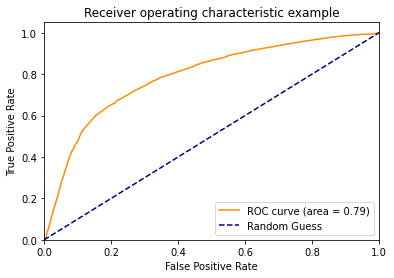


ROC Score:
0.7892940364438271


In [12]:
show_evaluation(y_test, y_pred1, y_proba1)

In [13]:
# Save predictions
method_name = 'Decision Tree'
predicted_probabilities = y_proba1
savePredictedProbabilities(method_name, y_test, predicted_probabilities)